Download important and useful libraries for this task

In [2]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [3]:
import gensim.downloader as api
w2v_model = api.load("glove-wiki-gigaword-100")

In [4]:
import pandas as pd
import numpy as np
import nltk    #for wordnet 
from nltk.corpus import wordnet as wn
import networkx as nx   # for building semantic graphs 
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ajaypunia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

loading all the files one by one accorsing to their age group 

In [7]:
df_childrens = pd.read_csv('/Users/ajaypunia/Desktop/NLP class/final_project_NLP/for_childrens.csv')
df_childrens.head()

,downloaded,item_id,item_definition,category,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,2025-03-30,1,baa baa,sounds,0.46,0.52,0.55,0.66,0.69,0.70,0.66,0.78,0.78,0.78,0.79,0.82,0.89,0.80,0.79
1,2025-03-30,2,choo choo,sounds,0.27,0.32,0.39,0.51,0.56,0.60,0.67,0.71,0.76,0.84,0.81,0.85,0.92,0.85,0.88
2,2025-03-30,3,cockadoodledoo,sounds,0.13,0.10,0.14,0.22,0.22,0.29,0.31,0.37,0.43,0.45,0.49,0.53,0.70,0.54,0.58
3,2025-03-30,4,grrr,sounds,0.54,0.50,0.54,0.63,0.61,0.65,0.63,0.73,0.76,0.76,0.75,0.80,0.90,0.79,0.80
4,2025-03-30,5,meow,sounds,0.49,0.47,0.55,0.67,0.69,0.75,0.76,0.80,0.86,0.88,0.88,0.91,0.96,0.91,0.92


In [8]:
df_childrens.shape

(680, 19)

In [9]:
df_teenagers = pd.read_excel('/Users/ajaypunia/Desktop/NLP class/final_project_NLP/for_teenagers.xlsx')
df_teenagers.head()

,Word,FREQcount,CDcount,FREQlow,Cdlow,SUBTLWF,Lg10WF,SUBTLCD,Lg10CD,Dom_PoS_SUBTLEX,Freq_dom_PoS_SUBTLEX,Percentage_dom_PoS,All_PoS_SUBTLEX,All_freqs_SUBTLEX,Zipf-value
0,a,1041179,8382,976941,8380,20415.274510,6.017526,99.928469,3.923399,Article,993445.0,0.960658,Article.Adverb.Letter.To.Noun.Preposition.Adje...,993445.33186.6441.744.257.52.5,7.309360
1,aa,87,70,6,5,1.705882,1.944483,0.834526,1.851258,Name,79.0,0.918605,Name.Noun,79.7,3.236317
2,aaa,25,23,5,3,0.490196,1.414973,0.274201,1.380211,Name,20.0,0.800000,Name.Noun,20.5,2.706807
3,aah,2688,634,52,37,52.705882,3.429591,7.558417,2.802774,Interjection,2657.0,1.000000,Interjection,2657,4.721425
4,aahed,1,1,1,1,0.019608,0.301030,0.011922,0.301030,Verb,1.0,1.000000,Verb,1,1.592864


In [10]:
df_teenagers.shape

(74286, 15)

In [11]:
df_adults = pd.read_excel('/Users/ajaypunia/Desktop/NLP class/final_project_NLP/for_adults .xlsx', sheet_name='1 lemmas')
df_adults.head()

,rank,lemma,PoS,freq,perMil,%caps,%allC,range,disp,blog,...,news,acad,blogPM,webPM,TVMPM,spokPM,ficPM,magPM,newsPM,acadPM
0,1,the,a,50033612,50385.16,0.11,0.00,482995,0.98,6266654,...,6579270,7440931,50434.35,55169.32,29524.14,45672.67,53310.74,53941.86,54042.73,62116.23
1,2,be,v,32394756,32622.71,0.03,0.01,481177,0.99,5594001,...,4102481,3689062,45020.81,41409.63,62695.87,55701.50,37289.40,33259.44,33698.16,30795.96
2,3,and,c,24778098,24952.20,0.09,0.00,478670,0.98,3205178,...,2993061,3627686,25795.44,26849.01,14249.23,26275.16,25860.15,26177.63,24585.28,30283.60
3,4,a,a,24225478,24395.69,0.04,0.04,478204,0.99,3098338,...,3299770,2602697,24935.58,24747.22,20690.47,23374.72,25107.33,27541.93,27104.62,21727.08
4,5,of,i,23159162,23321.89,0.01,0.00,477933,0.97,2897295,...,2867922,4500485,23317.58,26588.36,10918.77,20157.43,19270.82,25796.39,23557.38,37569.65


In [12]:
df_adults.shape

(5050, 25)

In [13]:
df_older = r'/Users/ajaypunia/Desktop/NLP class/final_project_NLP/googlebooks-eng-all-1gram-20120701-a'

In [14]:
columns = ['ngram', 'year', 'match_count', 'volume_count']
df = pd.read_csv(df_older, sep='\t', names=columns, header=None, quoting=3, nrows=1000000)
df_older = df[(df['year'] >= 1960) & (df['year'] <= 1980)]
df_grouped = df_older.groupby('ngram')['match_count'].sum().reset_index()
top_words = df_grouped.sort_values(by='match_count', ascending=False).head(500)
older_word_list = top_words['ngram'].str.lower().tolist()
print(older_word_list[:101])

['art', 'accompanied_verb', 'assumptions_noun', 'advised', 'allowance_noun', 'ambitious_adj', 'advancing_verb', 'alienation_noun', 'admirable_adj', 'averaged_verb', 'airport', 'affirmed_verb', 'anticipate_verb', 'amazing_adj', 'abnormalities_noun', 'absorbing', 'affiliation', 'acting_adj', 'accompaniment_noun', 'assent_noun', 'armaments', 'attitude', 'ad_noun', 'acth', 'athenian_adj', 'accessories', 'accuse', 'american_adj', 'authorizing', 'accrued', 'adhesion_noun', 'aisle_noun', 'affluence_noun', 'apron', 'abortions', 'appropriateness', 'adaptability_noun', 'affiliations', 'awesome', 'abstain_verb', 'anterior', 'amazon_noun', 'allocating_verb', 'allocation', 'apprehensions_noun', 'argument', 'adrenaline', 'archiv', 'alertness', 'aldehyde', 'almanac_noun', 'a3_noun', 'agree', 'abstained', 'aurangzeb', 'amman', 'applaud_verb', 'assented', 'austrian_noun', 'ayres_noun', 'abdominal', 'anima', 'atoms', 'aspect', 'aural_adj', 'arbeit_x', 'är_x', 'ache_noun', 'anchoring', 'adrenal_adj', 'ar

In [15]:
cleaned_older_words = [word.split('_')[0].lower() for word in older_word_list]
cleaned_older_words = list(set(cleaned_older_words))
print(cleaned_older_words[:101])
print(f"Total cleaned words: {len(cleaned_older_words)}")

['auroit', 'affirmed', 'apelles', 'administered', 'annalistic', 'alexandre', 'abdul', 'aade', 'andrianov', 'aura', 'airgap', 'aerograph', 'agree', 'altare', 'arye', 'aa', 'apsheron', 'arrays', 'avestan', 'archiv', 'a.c.t.u.', 'aryas', 'arbeit', 'accompanied', 'axim', 'auspiciously', 'ahrens', 'accrued', 'apolitical', 'assab', 'agl', 'amazon', 'ames', 'adrenal', 'aldan', 'apga', 'allures', 'antenna', 'acting', 'apparet', 'anta', 'armstrongs', 'aramco', 'agronomist', 'agnes', 'admini', 'autrui', 'andalusite', 'amar', 'appleman', 'anemometer', 'articulatory', 'amphotericin', 'amman', 'amador', 'archipel', 'armande', 'applied', 'anubhava', 'affirme', 'accordions', 'antigerman', 'autolysis', 'acwa', 'album', 'accolade', 'attentiveness', 'alphas', 'anima', 'abbevillian', 'astrophel', 'axonal', 'anticholinergic', 'afanasyev', 'allemands', 'attitude', 'alsike', 'ache', 'america.1', 'achlya', 'akber', 'apsaras', 'akio', 'amp', 'atory', 'advertise', 'acte', 'asthenosphere', 'är', 'acth', 'acquai

In [16]:
top_words.to_csv('older_adult_vocab_a.csv', index=False)

In [17]:
df_childrens['avg_understanding'] = df_childrens.loc[:, '16':'30'].mean(axis=1)
df_sorted = df_childrens.sort_values(by='avg_understanding', ascending=False)
child_word_list = df_sorted['item_definition'].dropna().str.lower().unique().tolist()[:1000]
print(child_word_list[:101])
print(f"Total words for children: {len(child_word_list)}")

['mommy*', 'daddy*', 'ball', 'bye', 'uh oh', 'no', 'dog', 'baby', 'shoe', 'hi', 'banana', 'moo', 'book', 'woof woof', 'meow', 'car', 'eye', 'nose', 'yes', 'grandma*', 'apple', 'cat', 'thank you', 'bird', 'baa baa', 'milk', 'duck', 'ear', 'bubbles', 'balloon', 'quack quack', 'ouch', 'cookie', 'please', 'cheese', 'grrr', 'bath', 'night night', 'hat', 'hot', 'shh/shush/hush', 'water (beverage)', 'grandpa*', 'juice', 'fish (animal)', 'choo choo', 'yum yum', 'truck', 'hello', 'go', 'all gone', 'cup', 'hair', 'diaper', 'owie/boo boo', 'kitty', 'vroom', "child's own name", 'peekaboo', 'bear', 'cow', 'eat', 'up', 'mouth', 'mine', 'more', 'bottle', 'water (not beverage)', 'spoon', 'bed', 'airplane', 'tree', 'cracker', 'sock', 'door', 'outside', 'bus', 'flower', 'down', 'blanket', 'train', 'horse', 'foot', 'belly button', 'boat', 'chair', 'bunny', 'hand', 'pig', 'moon', 'monkey', 'kiss', 'pizza', 'head', 'telephone', 'puppy', 'toe', 'light', 'potty', 'cold', 'tummy']
Total words for children: 68

for cleaning the * values in from the dataset

In [19]:
clean_child_words = [word.replace('*', '').strip().lower() for word in child_word_list]


print(clean_child_words[:101])
print(f"Total cleaned child words: {len(clean_child_words)}")

['mommy', 'daddy', 'ball', 'bye', 'uh oh', 'no', 'dog', 'baby', 'shoe', 'hi', 'banana', 'moo', 'book', 'woof woof', 'meow', 'car', 'eye', 'nose', 'yes', 'grandma', 'apple', 'cat', 'thank you', 'bird', 'baa baa', 'milk', 'duck', 'ear', 'bubbles', 'balloon', 'quack quack', 'ouch', 'cookie', 'please', 'cheese', 'grrr', 'bath', 'night night', 'hat', 'hot', 'shh/shush/hush', 'water (beverage)', 'grandpa', 'juice', 'fish (animal)', 'choo choo', 'yum yum', 'truck', 'hello', 'go', 'all gone', 'cup', 'hair', 'diaper', 'owie/boo boo', 'kitty', 'vroom', "child's own name", 'peekaboo', 'bear', 'cow', 'eat', 'up', 'mouth', 'mine', 'more', 'bottle', 'water (not beverage)', 'spoon', 'bed', 'airplane', 'tree', 'cracker', 'sock', 'door', 'outside', 'bus', 'flower', 'down', 'blanket', 'train', 'horse', 'foot', 'belly button', 'boat', 'chair', 'bunny', 'hand', 'pig', 'moon', 'monkey', 'kiss', 'pizza', 'head', 'telephone', 'puppy', 'toe', 'light', 'potty', 'cold', 'tummy']
Total cleaned child words: 680


building a semantic newtrok for childrens 

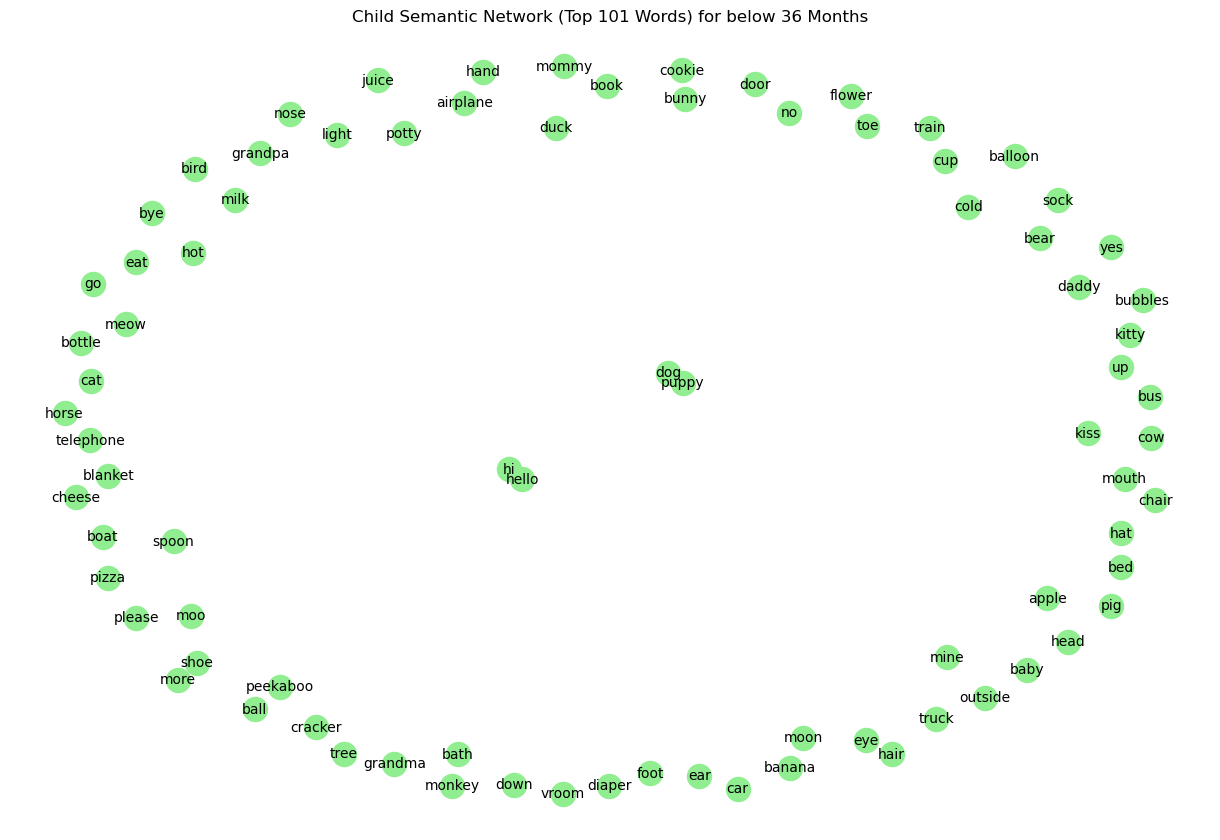

In [109]:
small_child_words = clean_child_words[:100]
G_small = nx.Graph()

for word in small_child_words:
    synsets = wn.synsets(word)
    if synsets:
        main_syn = synsets[0]
        G_small.add_node(word)
        for lemma in main_syn.lemmas():
            synonym = lemma.name().lower()
            if synonym in small_child_words and synonym != word:
                G_small.add_edge(word, synonym)

        
        for hyper in main_syn.hypernyms():
            for lemma in hyper.lemmas():
                hyper_word = lemma.name().lower()
                if hyper_word in small_child_words and hyper_word != word:
                    G_small.add_edge(word, hyper_word)


plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_small, seed=42)
nx.draw(G_small, pos, with_labels=True, font_size=10, node_color='lightgreen', edge_color='gray')
plt.title("Child Semantic Network (Top 101 Words) for below 36 Months")
plt.show()

now for treenagers 

In [23]:
df_teenagers.head()

,Word,FREQcount,CDcount,FREQlow,Cdlow,SUBTLWF,Lg10WF,SUBTLCD,Lg10CD,Dom_PoS_SUBTLEX,Freq_dom_PoS_SUBTLEX,Percentage_dom_PoS,All_PoS_SUBTLEX,All_freqs_SUBTLEX,Zipf-value
0,a,1041179,8382,976941,8380,20415.274510,6.017526,99.928469,3.923399,Article,993445.0,0.960658,Article.Adverb.Letter.To.Noun.Preposition.Adje...,993445.33186.6441.744.257.52.5,7.309360
1,aa,87,70,6,5,1.705882,1.944483,0.834526,1.851258,Name,79.0,0.918605,Name.Noun,79.7,3.236317
2,aaa,25,23,5,3,0.490196,1.414973,0.274201,1.380211,Name,20.0,0.800000,Name.Noun,20.5,2.706807
3,aah,2688,634,52,37,52.705882,3.429591,7.558417,2.802774,Interjection,2657.0,1.000000,Interjection,2657,4.721425
4,aahed,1,1,1,1,0.019608,0.301030,0.011922,0.301030,Verb,1.0,1.000000,Verb,1,1.592864


for clean the dataset and getting mix response of words not only top 500n beacuse they all starts from A only apply this for tgetting true top 500 words

In [25]:
df_subtlex = pd.read_excel('/Users/ajaypunia/Desktop/NLP class/final_project_NLP/for_teenagers.xlsx')
df_subtlex.head()

,Word,FREQcount,CDcount,FREQlow,Cdlow,SUBTLWF,Lg10WF,SUBTLCD,Lg10CD,Dom_PoS_SUBTLEX,Freq_dom_PoS_SUBTLEX,Percentage_dom_PoS,All_PoS_SUBTLEX,All_freqs_SUBTLEX,Zipf-value
0,a,1041179,8382,976941,8380,20415.274510,6.017526,99.928469,3.923399,Article,993445.0,0.960658,Article.Adverb.Letter.To.Noun.Preposition.Adje...,993445.33186.6441.744.257.52.5,7.309360
1,aa,87,70,6,5,1.705882,1.944483,0.834526,1.851258,Name,79.0,0.918605,Name.Noun,79.7,3.236317
2,aaa,25,23,5,3,0.490196,1.414973,0.274201,1.380211,Name,20.0,0.800000,Name.Noun,20.5,2.706807
3,aah,2688,634,52,37,52.705882,3.429591,7.558417,2.802774,Interjection,2657.0,1.000000,Interjection,2657,4.721425
4,aahed,1,1,1,1,0.019608,0.301030,0.011922,0.301030,Verb,1.0,1.000000,Verb,1,1.592864


In [113]:
nltk.download('stopwords')
from nltk.corpus import stopwords
df_filtered = df_subtlex[df_subtlex['Zipf-value'] >= 3.0]
pos_keep = ['Noun', 'Verb', 'Adjective', 'Adverb']
df_filtered = df_filtered[df_filtered['Dom_PoS_SUBTLEX'].isin(pos_keep)]
df_filtered = df_filtered.sort_values(by='FREQcount', ascending=False)
teen_words = df_filtered['Word'].dropna().str.lower().unique().tolist()
teen_words = [w for w in teen_words if w.isalpha() and w not in stopwords.words('english')]
teen_words = teen_words[:100] 
print(teen_words[:101])
print(f"Total words: {len(teen_words)}")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ajaypunia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['know', 'get', 'right', 'go', 'got', 'come', 'well', 'want', 'think', 'good', 'see', 'let', 'going', 'back', 'okay', 'time', 'look', 'take', 'man', 'would', 'tell', 'say', 'could', 'really', 'little', 'way', 'make', 'never', 'need', 'mean', 'mr', 'sorry', 'give', 'thank', 'love', 'said', 'people', 'please', 'sure', 'thing', 'sir', 'maybe', 'help', 'even', 'night', 'call', 'talk', 'find', 'wait', 'put', 'great', 'thought', 'day', 'work', 'life', 'better', 'still', 'home', 'guy', 'around', 'away', 'new', 'ever', 'stop', 'keep', 'told', 'must', 'things', 'big', 'long', 'always', 'nice', 'name', 'money', 'guys', 'feel', 'believe', 'thanks', 'old', 'place', 'fine', 'kind', 'lot', 'years', 'made', 'leave', 'girl', 'hear', 'father', 'bad', 'listen', 'remember', 'boy', 'coming', 'wrong', 'might', 'stay', 'house', 'may', 'baby']
Total words: 100


now building semantic newtwork for teenagers 

Teen graph nodes: 98
Teen graph edges: 19


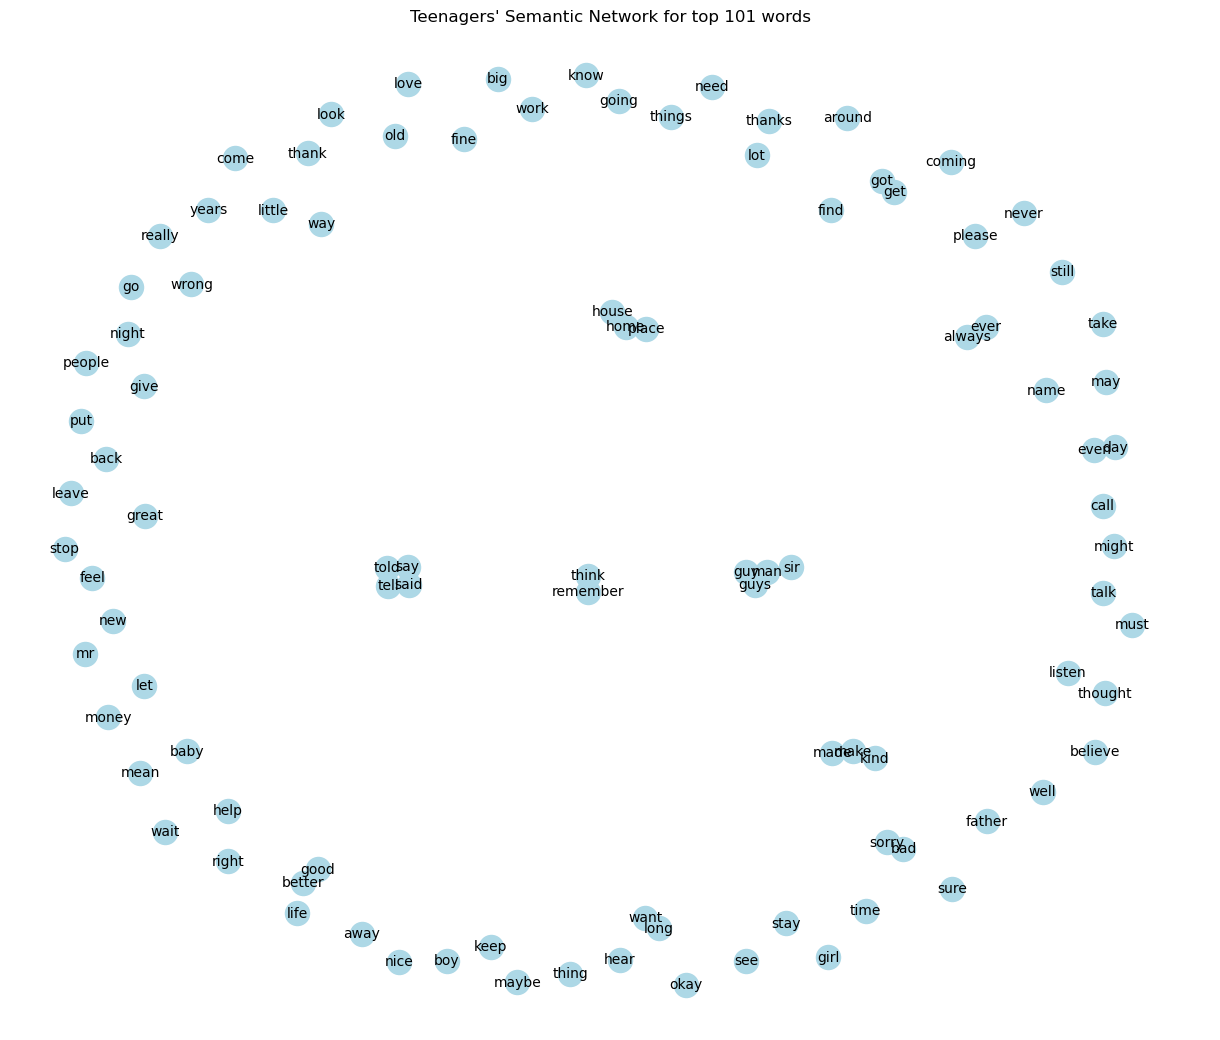

In [115]:
G_teen = nx.Graph()
for word in teen_words:
    synsets = wn.synsets(word)
    if synsets:
        main_syn = synsets[0]
        G_teen.add_node(word)
        for lemma in main_syn.lemmas():
            synonym = lemma.name().lower()
            if synonym in teen_words and synonym != word:
                G_teen.add_edge(word, synonym)

        for hyper in main_syn.hypernyms():
            for lemma in hyper.lemmas():
                hyper_word = lemma.name().lower()
                if hyper_word in teen_words and hyper_word != word:
                    G_teen.add_edge(word, hyper_word)
print(f"Teen graph nodes: {G_teen.number_of_nodes()}")
print(f"Teen graph edges: {G_teen.number_of_edges()}")

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_teen, seed=42)
nx.draw(G_teen, pos, with_labels=True, font_size=10, node_color='lightblue')
plt.title("Teenagers' Semantic Network for top 101 words")
plt.show()

	1.	Words form clusters based on meanings — like actions, emotions, or people.
	2.	Teenagers use more abstract, emotional, and social language than kids.
	3.	Not all high-frequency words are connected in WordNet — but that’s expected.
	4.	This network simulates how a teen mind stores & retrieves words.


for adults now 

In [31]:
df_adults.head()

,rank,lemma,PoS,freq,perMil,%caps,%allC,range,disp,blog,...,news,acad,blogPM,webPM,TVMPM,spokPM,ficPM,magPM,newsPM,acadPM
0,1,the,a,50033612,50385.16,0.11,0.00,482995,0.98,6266654,...,6579270,7440931,50434.35,55169.32,29524.14,45672.67,53310.74,53941.86,54042.73,62116.23
1,2,be,v,32394756,32622.71,0.03,0.01,481177,0.99,5594001,...,4102481,3689062,45020.81,41409.63,62695.87,55701.50,37289.40,33259.44,33698.16,30795.96
2,3,and,c,24778098,24952.20,0.09,0.00,478670,0.98,3205178,...,2993061,3627686,25795.44,26849.01,14249.23,26275.16,25860.15,26177.63,24585.28,30283.60
3,4,a,a,24225478,24395.69,0.04,0.04,478204,0.99,3098338,...,3299770,2602697,24935.58,24747.22,20690.47,23374.72,25107.33,27541.93,27104.62,21727.08
4,5,of,i,23159162,23321.89,0.01,0.00,477933,0.97,2897295,...,2867922,4500485,23317.58,26588.36,10918.77,20157.43,19270.82,25796.39,23557.38,37569.65


Select the top 100–300 high-frequency adult words
Keep only nouns, verbs, adjectives, adverbs
Remove short/common junk words like “the”, “and”, “a”

Clean and Filter the Words

In [33]:
df_adult_clean = df_adults[['lemma', 'PoS', 'freq']]
allowed_pos = ['n', 'v', 'a', 'r']  
df_adult_clean = df_adult_clean[df_adult_clean['PoS'].isin(allowed_pos)]

stop_words = set(stopwords.words('english'))
df_adult_clean = df_adult_clean[~df_adult_clean['lemma'].isin(stop_words)]
df_adult_clean = df_adult_clean.drop_duplicates(subset='lemma')
df_adult_clean = df_adult_clean.sort_values(by='freq', ascending=False)

adult_words = df_adult_clean['lemma'].str.lower().tolist()[:300]
print(adult_words[:101])
print("Total words:", len(adult_words))

['say', 'go', 'get', 'know', 'would', 'make', 'think', 'time', 'see', 'come', 'people', 'take', 'year', 'want', 'could', 'look', 'way', 'thing', 'well', 'also', 'use', 'tell', 'man', 'day', 'find', 'give', 'need', 'back', 'even', 'really', 'work', 'life', 'right', 'try', 'let', 'call', 'woman', 'may', 'still', 'mean', 'never', 'world', 'feel', 'child', 'ask', 'school', 'state', 'talk', 'keep', 'leave', 'put', 'like', 'help', 'start', 'every', 'become', 'happen', 'family', 'president', 'house', 'show', 'student', 'seem', 'might', 'part', 'hear', 'place', 'problem', 'believe', 'country', 'always', 'week', 'point', 'hand', 'play', 'turn', 'group', 'run', 'guy', 'case', 'question', 'night', 'live', 'game', 'number', 'write', 'bring', 'money', 'lot', 'book', 'system', 'government', 'city', 'company', 'story', 'today', 'job', 'move', 'must', 'friend', 'begin']
Total words: 300


building semantic newtwork graph for adults 

Adult graph nodes: 297
Adult graph edges: 118


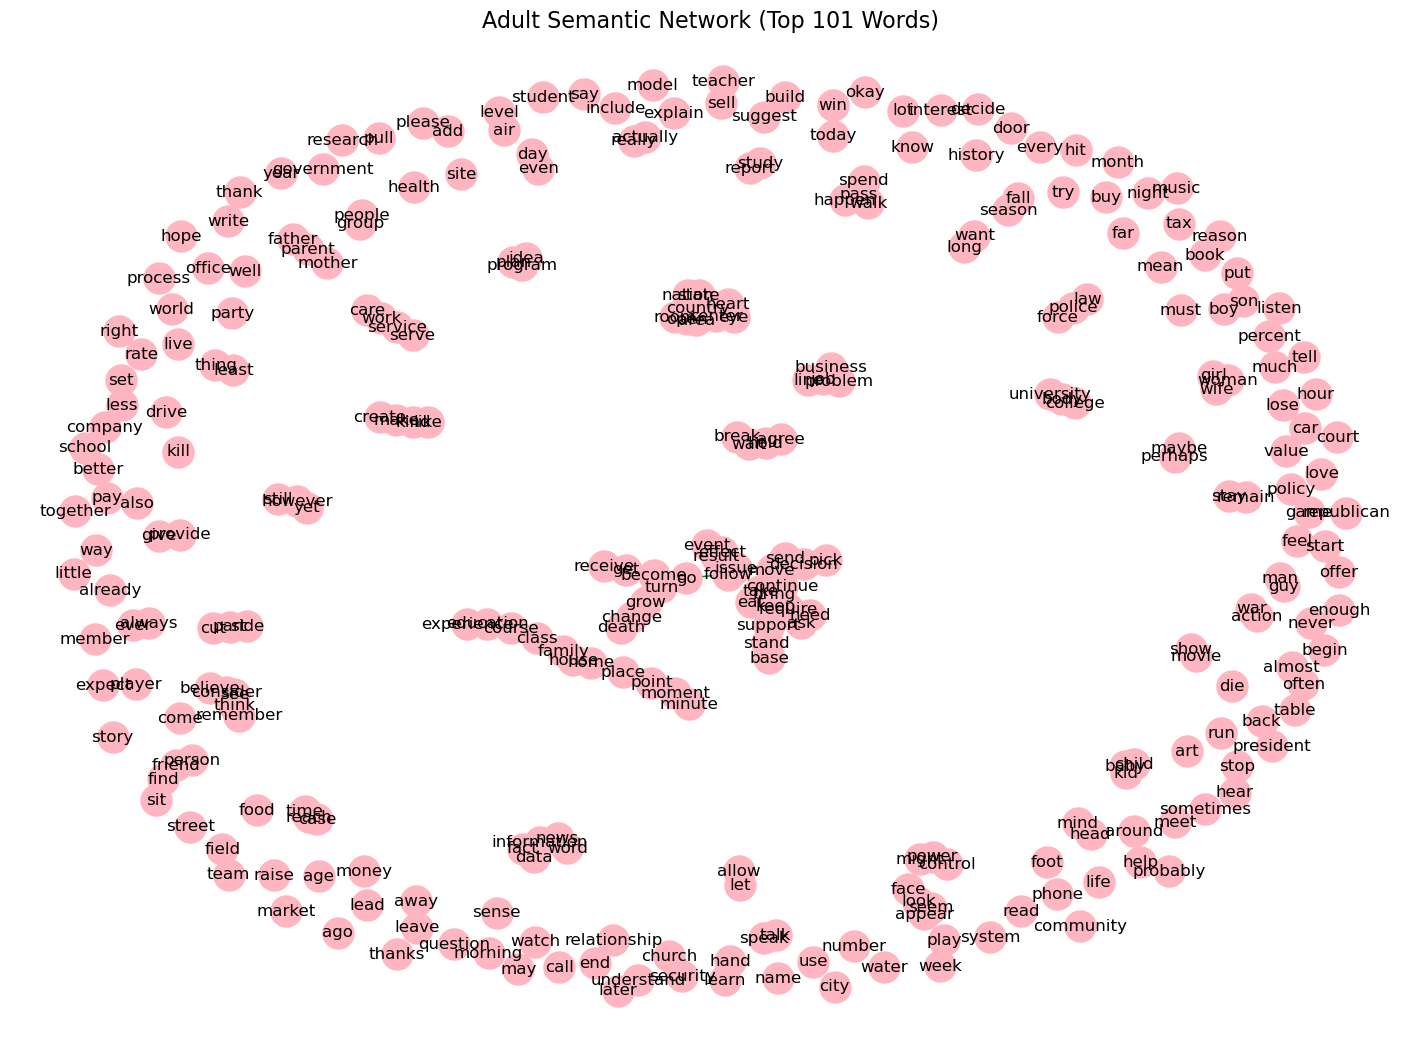

In [35]:
G_adult = nx.Graph()
for word in adult_words:
    synsets = wn.synsets(word)
    if synsets:
        main_syn = synsets[0]
        G_adult.add_node(word)

        for lemma in main_syn.lemmas():
            synonym = lemma.name().lower()
            if synonym in adult_words and synonym != word:
                G_adult.add_edge(word, synonym)

        
        for hyper in main_syn.hypernyms():
            for lemma in hyper.lemmas():
                hyper_word = lemma.name().lower()
                if hyper_word in adult_words and hyper_word != word:
                    G_adult.add_edge(word, hyper_word)

print(f"Adult graph nodes: {G_adult.number_of_nodes()}")
print(f"Adult graph edges: {G_adult.number_of_edges()}")


plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_adult, seed=42)
nx.draw(
    G_adult, pos,
    with_labels=True,
    font_size=12,
    node_color='lightpink',
    node_size=500,
    edge_color='green'
)
plt.title("Adult Semantic Network (Top 101 Words)", fontsize=16)
plt.show()

Nodes: 99 words (almost all connected)
Edges: 14 links (fewer than teens/children)
Clusters (Examples):
say – tell – right
know – begin – help – happen
guy – man
group – people
get – become – turn – go
job – problem, state – country, house – family


now for older people

In [38]:
df_older.head()

,ngram,year,match_count,volume_count
7,A'Aang_NOUN,1962,2,2
8,A'Aang_NOUN,1963,1,1
9,A'Aang_NOUN,1966,45,13
10,A'Aang_NOUN,1967,6,4
11,A'Aang_NOUN,1968,5,4


cleaning the dataset for older people

In [40]:
df_older.loc[:, 'word'] = df_older['ngram'].str.split('_').str[0].str.lower()
word_freq = df_older.groupby('word')['match_count'].sum().reset_index()
word_freq = word_freq.sort_values(by='match_count', ascending=False).drop_duplicates()
word_freq = word_freq[word_freq['word'].str.isalpha()]
old_words = word_freq['word'].tolist()[:500]

print(old_words[:101])
print("Total older adult words:", len(old_words))

['art', 'accompanied', 'assumptions', 'advised', 'allowance', 'ambitious', 'advancing', 'alienation', 'admirable', 'averaged', 'airport', 'affirmed', 'anticipate', 'amazing', 'abnormalities', 'absorbing', 'affiliation', 'acting', 'accompaniment', 'assent', 'armaments', 'attitude', 'ad', 'acth', 'athenian', 'accessories', 'accuse', 'american', 'authorizing', 'accrued', 'aisle', 'adhesion', 'affluence', 'apron', 'adaptability', 'abortions', 'appropriateness', 'affiliations', 'awesome', 'anterior', 'abstain', 'amazon', 'allocating', 'allocation', 'apprehensions', 'argument', 'adrenaline', 'archiv', 'alertness', 'aldehyde', 'almanac', 'agree', 'abstained', 'aurangzeb', 'amman', 'applaud', 'assented', 'austrian', 'ayres', 'abdominal', 'anima', 'atoms', 'aspect', 'aural', 'arbeit', 'acknowledgment', 'är', 'ache', 'articulatory', 'anchoring', 'adrenal', 'amp', 'applied', 'aurora', 'austenite', 'anaphylactic', 'adenomas', 'assail', 'alive', 'axonal', 'aix', 'attache', 'acquisitions', 'avowal',

/var/folders/zq/9lhmxnys5xs7vhdswrsp_yg80000gn/T/ipykernel_6132/4108207557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_older.loc[:, 'word'] = df_older['ngram'].str.split('_').str[0].str.lower()


making simantic network for older people

Older adults graph - Nodes: 93, Edges: 6


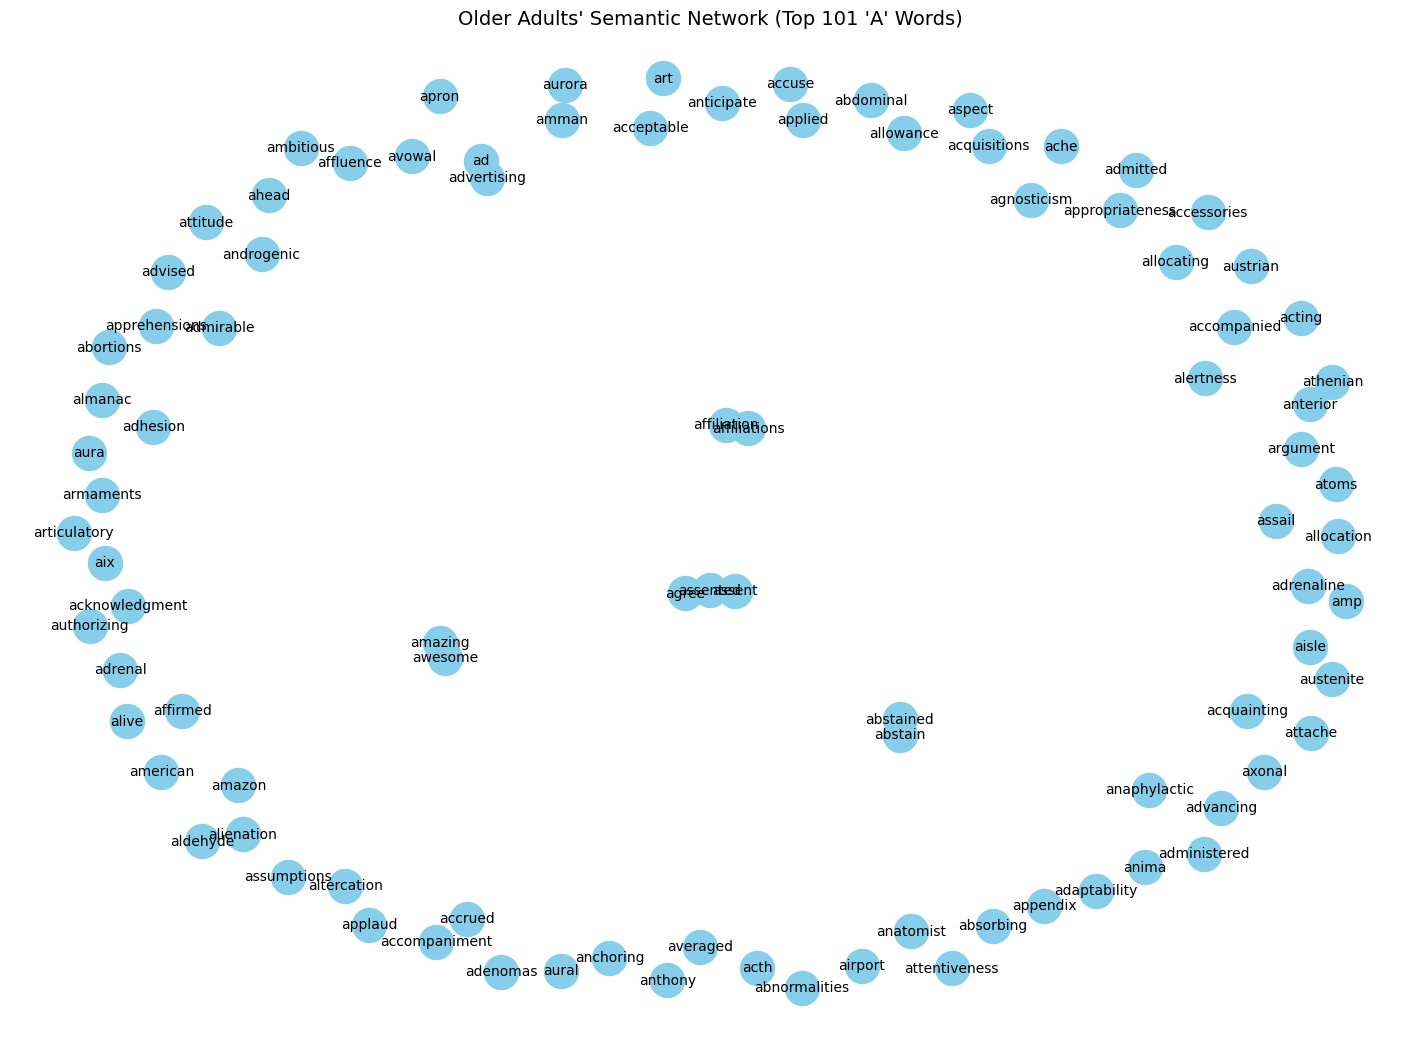

In [42]:
older_words = [
    'art', 'accompanied', 'assumptions', 'advised', 'allowance', 'ambitious',
    'advancing', 'alienation', 'admirable', 'averaged', 'airport', 'affirmed',
    'anticipate', 'amazing', 'abnormalities', 'absorbing', 'affiliation',
    'acting', 'accompaniment', 'assent', 'armaments', 'attitude', 'ad',
    'acth', 'athenian', 'accessories', 'accuse', 'american', 'authorizing',
    'accrued', 'aisle', 'adhesion', 'affluence', 'apron', 'adaptability',
    'abortions', 'appropriateness', 'affiliations', 'awesome', 'anterior',
    'abstain', 'amazon', 'allocating', 'allocation', 'apprehensions',
    'argument', 'adrenaline', 'archiv', 'alertness', 'aldehyde', 'almanac',
    'agree', 'abstained', 'aurangzeb', 'amman', 'applaud', 'assented',
    'austrian', 'ayres', 'abdominal', 'anima', 'atoms', 'aspect', 'aural',
    'arbeit', 'acknowledgment', 'är', 'ache', 'articulatory', 'anchoring',
    'adrenal', 'amp', 'applied', 'aurora', 'austenite', 'anaphylactic',
    'adenomas', 'assail', 'alive', 'axonal', 'aix', 'attache', 'acquisitions',
    'avowal', 'advertising', 'acceptable', 'agnosticism', 'ahead',
    'altercation', 'aura', 'acosta', 'attentiveness', 'against', 'anatomist',
    'appendix', 'acquainting', 'administered', 'anthony', 'admitted',
    'attractiv', 'androgenic'
]
G_older = nx.Graph()

for word in older_words:
    synsets = wn.synsets(word)
    if synsets:
        main_syn = synsets[0]
        G_older.add_node(word)

        for lemma in main_syn.lemmas():
            synonym = lemma.name().lower()
            if synonym in older_words and synonym != word:
                G_older.add_edge(word, synonym)
        for hyper in main_syn.hypernyms():
            for lemma in hyper.lemmas():
                hyper_word = lemma.name().lower()
                if hyper_word in older_words and hyper_word != word:
                    G_older.add_edge(word, hyper_word)

print(f"Older adults graph - Nodes: {G_older.number_of_nodes()}, Edges: {G_older.number_of_edges()}")

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_older, seed=42)
nx.draw(G_older, pos, with_labels=True, font_size=10, node_size=600, node_color='skyblue', edge_color='gray')
plt.title("Older Adults' Semantic Network (Top 101 'A' Words)", fontsize=14)
plt.show()

Nodes (94)
Words from your list â€” e.g. art, ambitious, aura, ache
ðŸ”— Edges (6)
Semantic relationships (synonyms, hypernyms) detected by WordNet
ðŸŽ¯ Why so few edges?
Because these â€œAâ€ words are from varied domains, they connect less often. Still useful to show semantic sparsity in older vocabulary.


In [44]:
def visualize_retrieval(graph, word, steps=11):
    if word not in graph:
        print(f"'{word}' not found in the graph.")
        return
    reachable = nx.single_source_shortest_path_length(graph, word, cutoff=steps)
    sub_nodes = list(reachable.keys())
    subgraph = graph.subgraph(sub_nodes)
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(subgraph, k=0.5, seed=42) 
    nx.draw(
        subgraph, pos,
        with_labels=True,
        node_color='lightblue',
        edge_color='gray',
        node_size=800,
        font_size=10,
        font_weight='bold'
    )
    nx.draw_networkx_nodes(subgraph, pos, nodelist=[word], node_color='orange')  
    plt.title(f"Semantic Retrieval from '{word}' (within {steps} steps)", fontsize=14)
    plt.show()

    print(f" Retrieved words: {len(sub_nodes) - 1}")

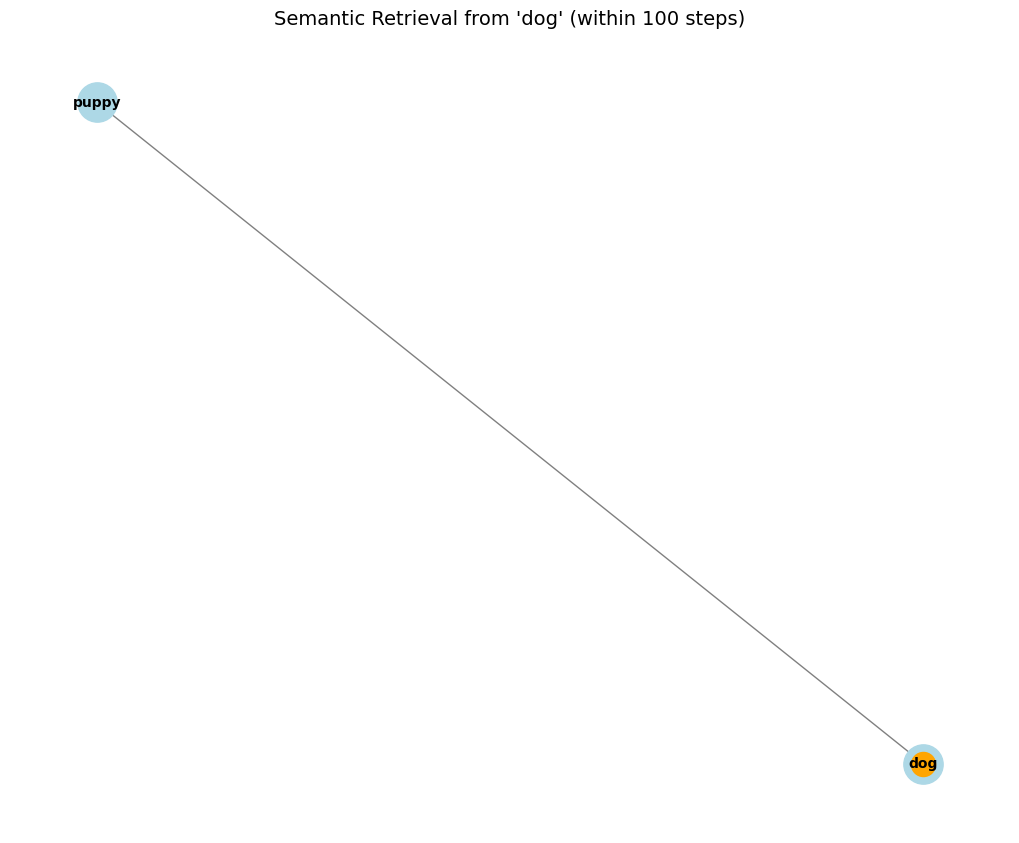

 Retrieved words: 1


In [93]:
visualize_retrieval(G_small, "dog", steps=100)

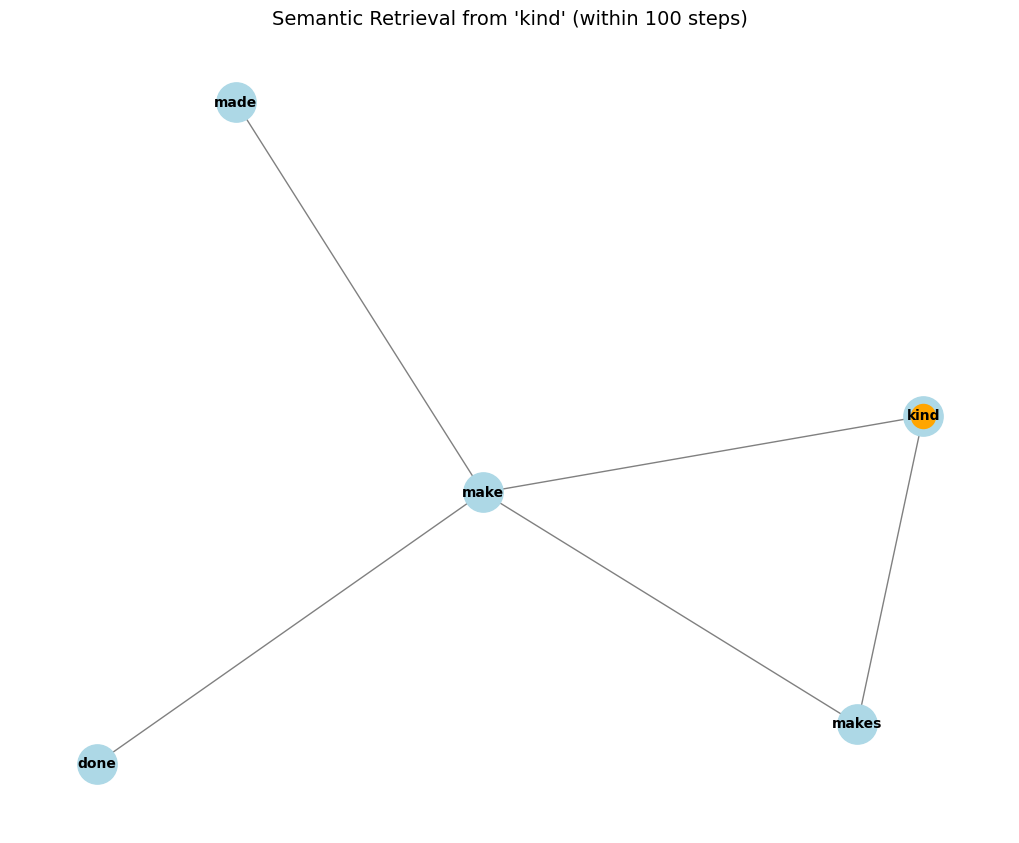

 Retrieved words: 4


In [95]:
visualize_retrieval(G_teen, "kind", steps=100)

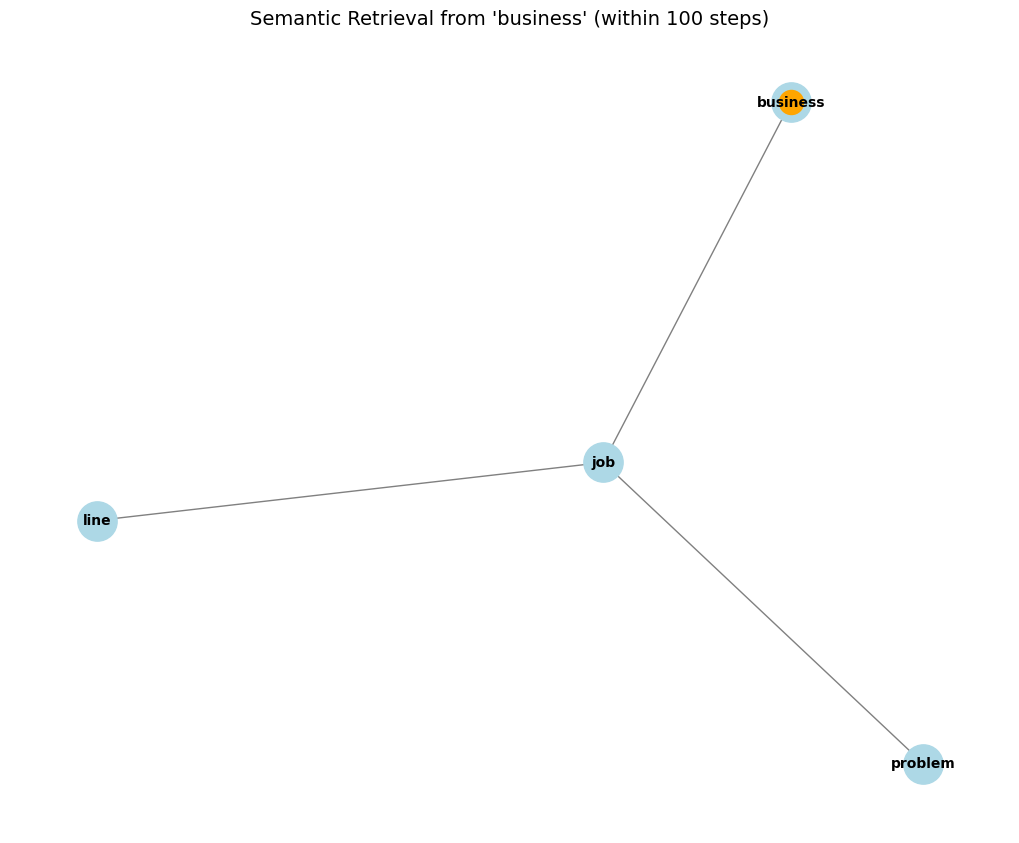

 Retrieved words: 3


In [97]:
visualize_retrieval(G_adult, "business", steps=100)

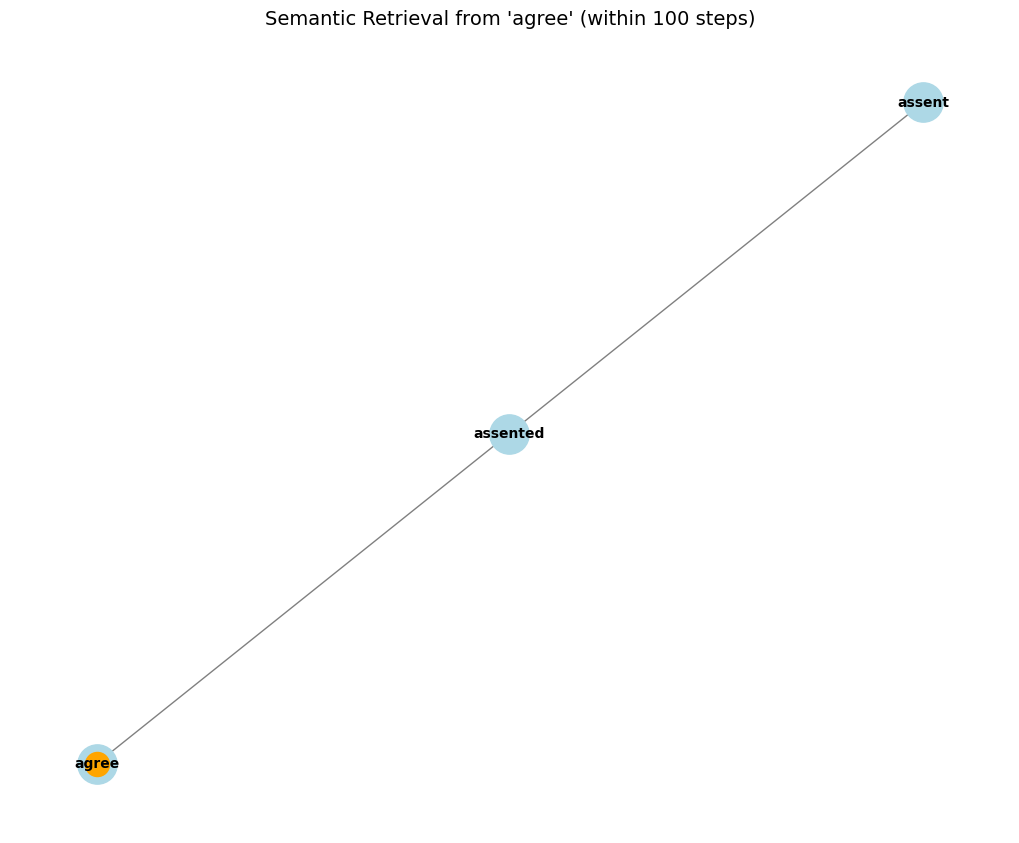

 Retrieved words: 2


In [99]:
visualize_retrieval(G_older, "agree", steps=100)

from word2vec trying represetation

tryding to measure the distance between the words that re connecting so i can think about how many time it take to retrieve in brain to get that word so if the distcance in low between the words so its easily to get and if distace is large to getting that words take long time 

In [101]:
def measure_retrieval_speed(graph, word, steps=2):
    if word not in graph:
        print(f"'{word}' not found.")
        return
    reachable = nx.single_source_shortest_path_length(graph, word, cutoff=steps)
    distances = list(reachable.values())
    
    print(f" - From '{word}':")
    print(f" - Total words retrieved within {steps} steps: {len(distances)-1}")
    print(f" - Average distance: {sum(distances)/len(distances):.2f}")

In [103]:
measure_retrieval_speed(G_small, "dog", steps=10)

 - From 'dog':
 - Total words retrieved within 10 steps: 1
 - Average distance: 0.50


In [105]:
measure_retrieval_speed(G_teen, "kind", steps=10)

 - From 'kind':
 - Total words retrieved within 10 steps: 4
 - Average distance: 1.20


In [54]:
measure_retrieval_speed(G_adult, "business", steps=10)

 - From 'business':
 - Total words retrieved within 10 steps: 3
 - Average distance: 1.25


In [55]:
measure_retrieval_speed(G_older, "agree", steps=10)

 - From 'agree':
 - Total words retrieved within 10 steps: 2
 - Average distance: 1.00
